In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset from the correct path
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()
print("\n--- Descriptive Statistics ---")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

--- Descriptive Statistics ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.53

In [6]:
# Columns where 0 means "missing value"
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Check how many missing entries
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

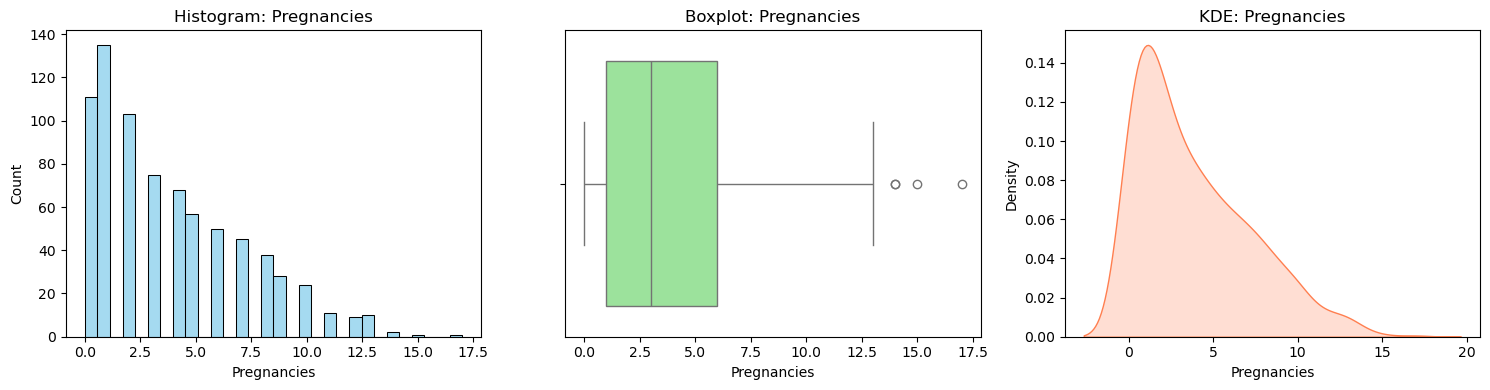

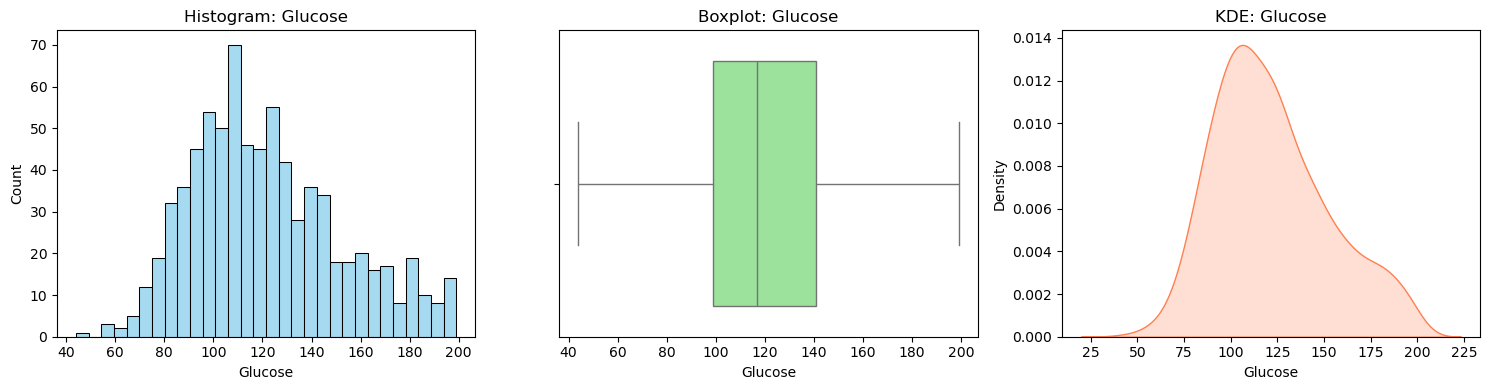

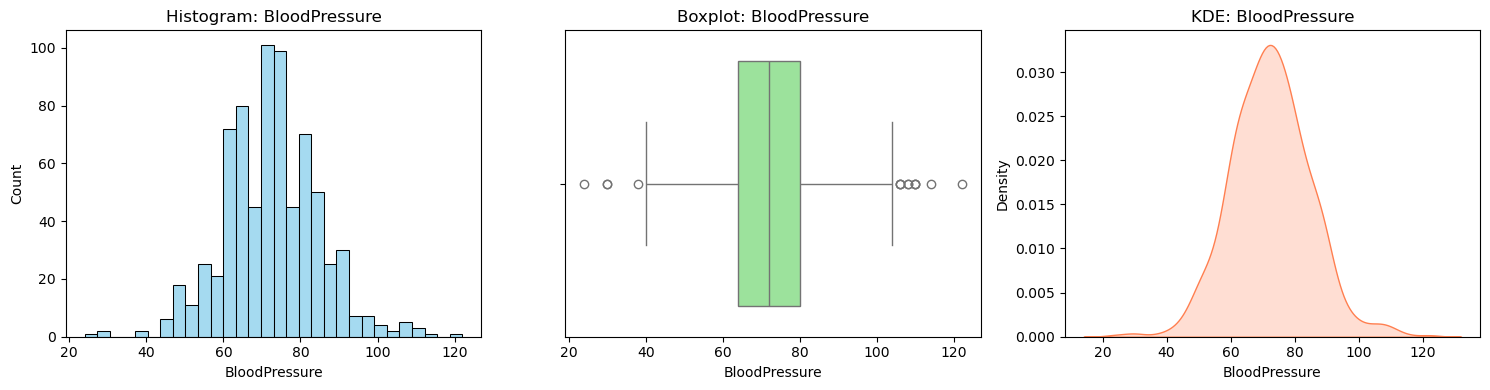

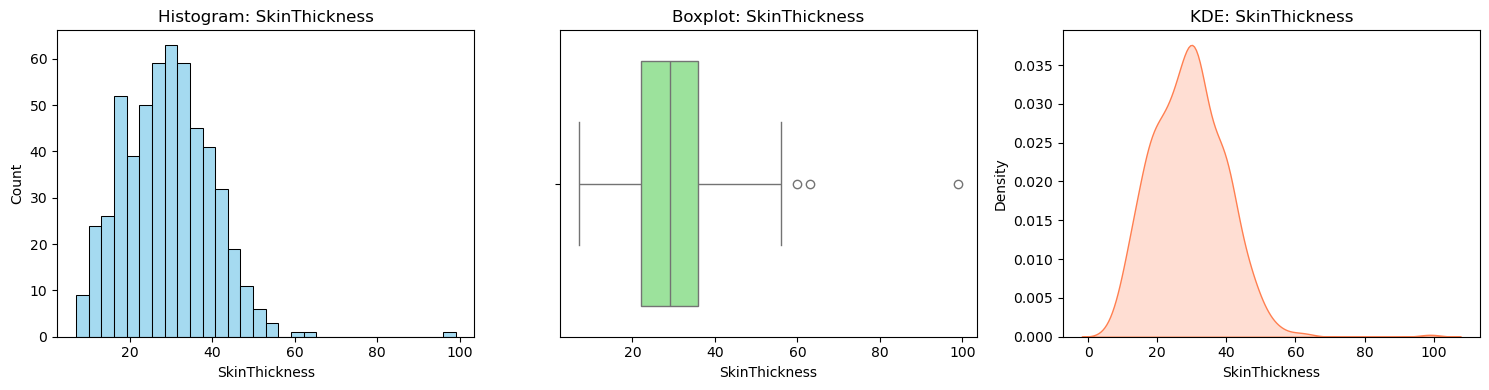

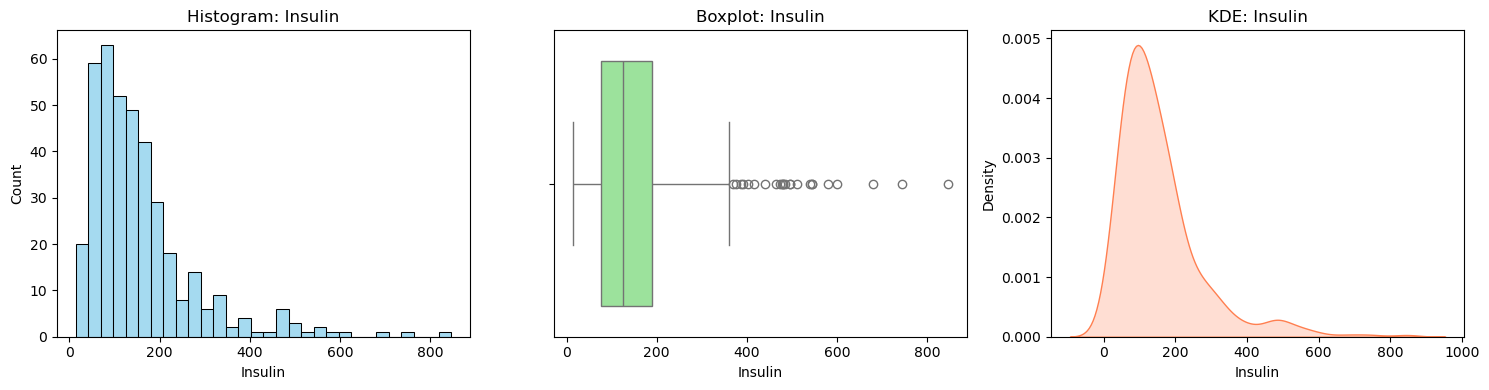

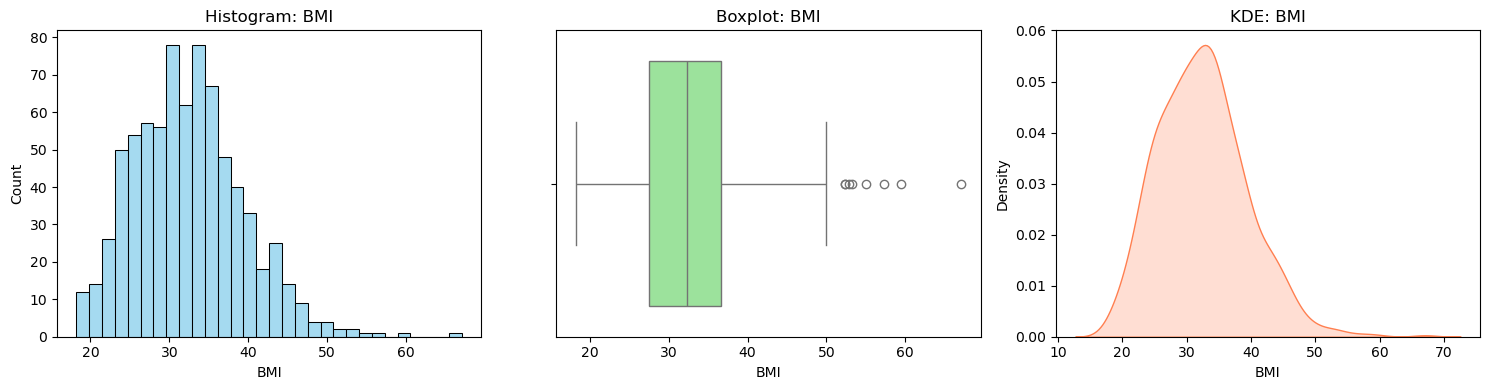

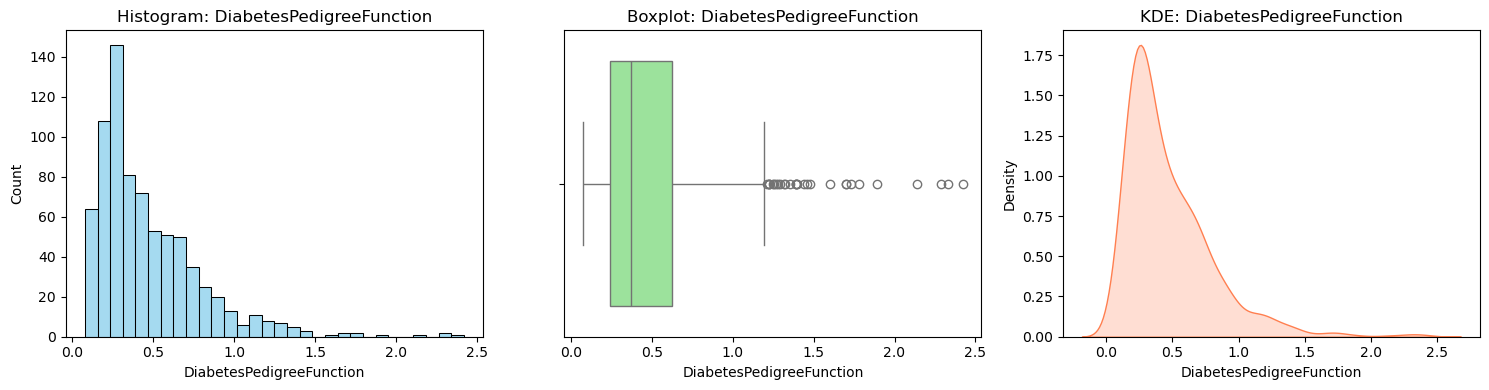

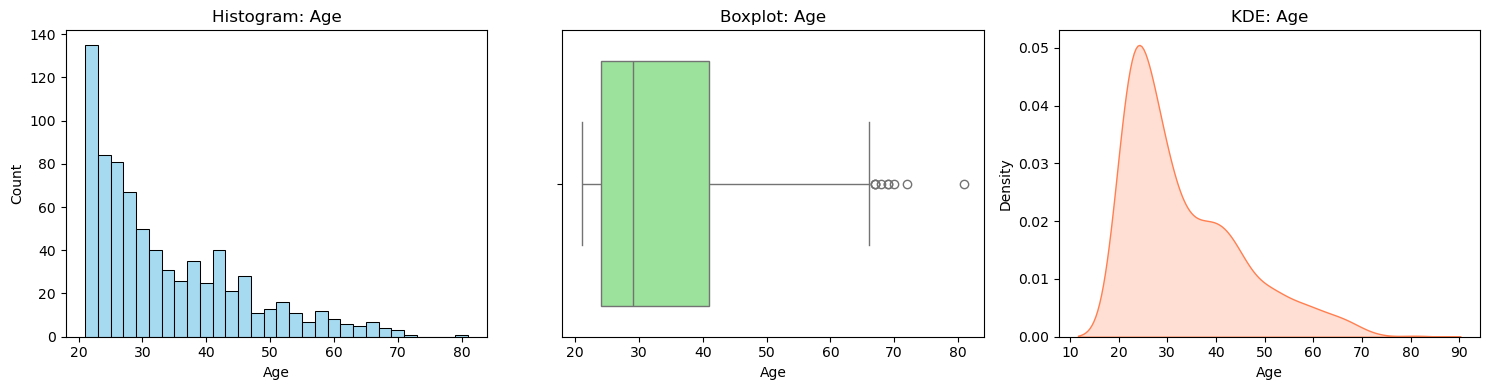

In [7]:
features = df.columns[:-1]  # Exclude Outcome

for col in features:
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[col].dropna(), bins=30, kde=False, color="skyblue")
    plt.title(f"Histogram: {col}")

    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot: {col}")

    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col].dropna(), fill=True, color="coral")
    plt.title(f"KDE: {col}")

    plt.tight_layout()
    plt.show()


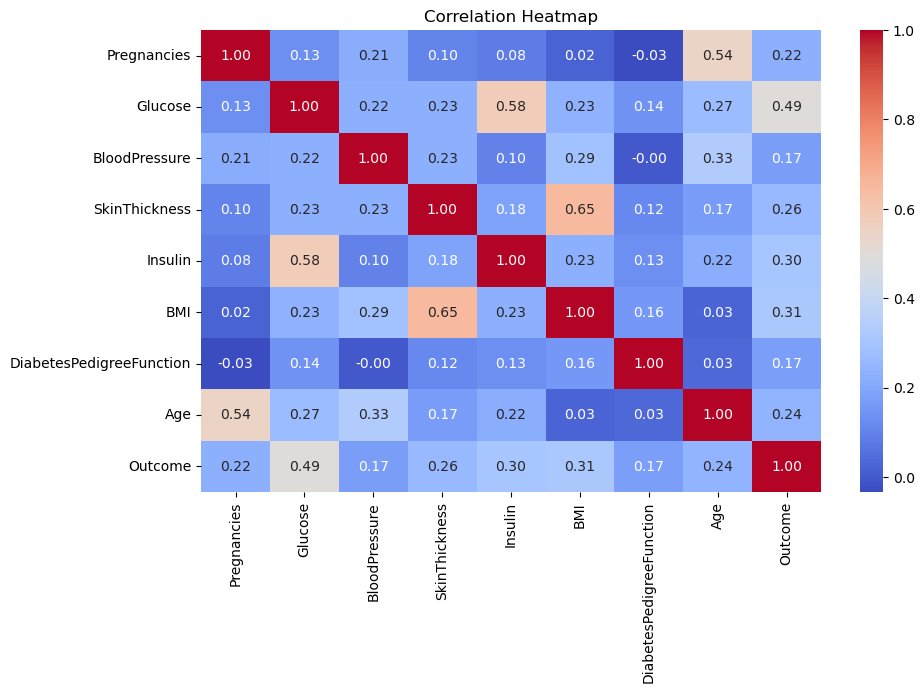

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


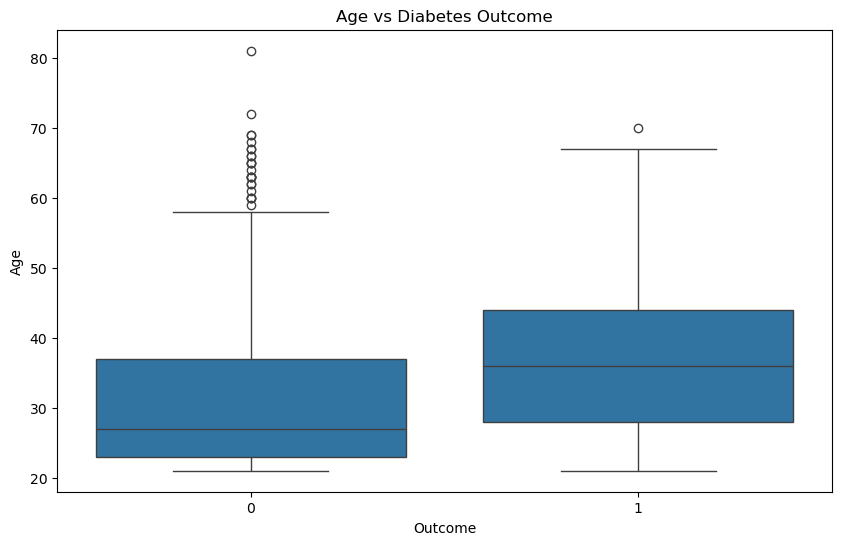

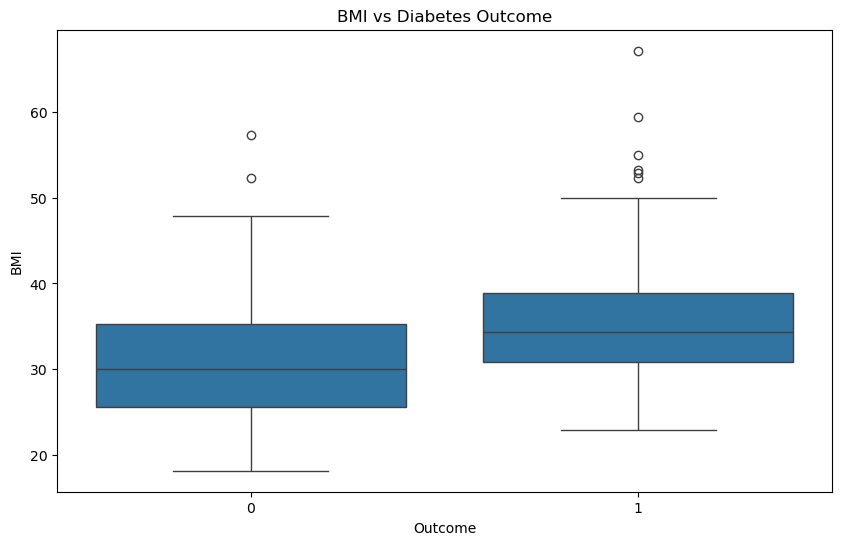

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Diabetes Outcome")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()


C:\Users\Aditi\AppData\Local\Temp\ipykernel_2888\2070146221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["PCA1"] = X_pca[:, 0]
C:\Users\Aditi\AppData\Local\Temp\ipykernel_2888\2070146221.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["PCA2"] = X_pca[:, 1]
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

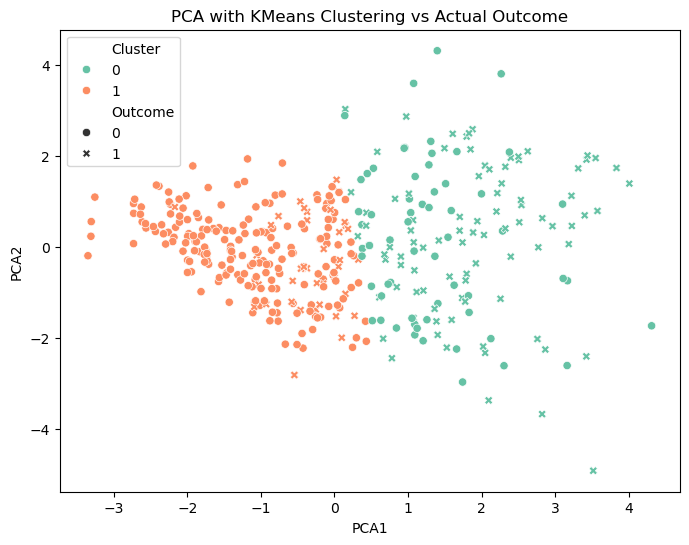

In [10]:
# Drop rows with missing values temporarily
df_clean = df.dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean.drop("Outcome", axis=1))

# PCA for 2D representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA to DataFrame
df_clean["PCA1"] = X_pca[:, 0]
df_clean["PCA2"] = X_pca[:, 1]

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_pca)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue="Cluster", style="Outcome", palette="Set2")
plt.title("PCA with KMeans Clustering vs Actual Outcome")
plt.show()


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


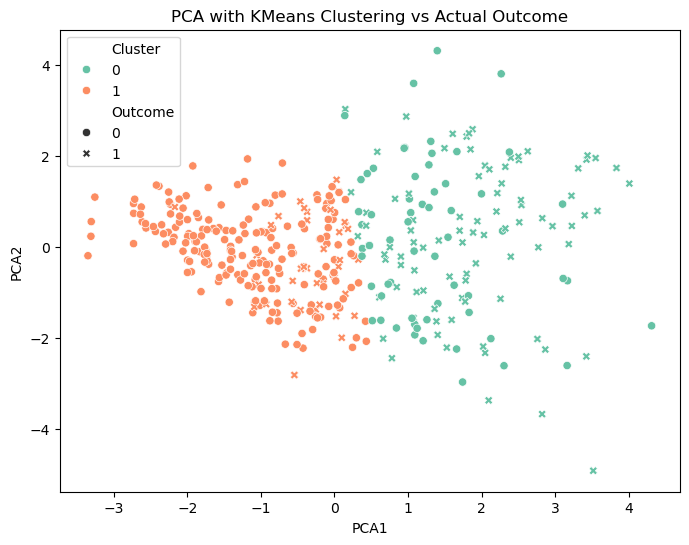

In [11]:
# Drop rows with missing values temporarily
df_clean = df.dropna().copy()  # Explicit copy avoids warning

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean.drop("Outcome", axis=1))

# PCA for 2D representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Safely add PCA components
df_clean.loc[:, "PCA1"] = X_pca[:, 0]
df_clean.loc[:, "PCA2"] = X_pca[:, 1]

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_clean.loc[:, "Cluster"] = kmeans.fit_predict(X_pca)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue="Cluster", style="Outcome", palette="Set2")
plt.title("PCA with KMeans Clustering vs Actual Outcome")
plt.show()


In [12]:
## 📌 Final EDA Summary & Insights

1. **Glucose** level has the highest correlation with diabetes.
2. Patients with higher **BMI** and **Age** are more likely to have diabetes.
3. There are significant **outliers** in Insulin and SkinThickness — important for preprocessing.
4. PCA revealed that diabetic and non-diabetic patients show distinct patterns in feature space.
5. KMeans clustering loosely aligns with the actual outcomes, showing some natural separation in the data.
6. Dataset has missing values in 5 medical features which should be imputed before modeling.


SyntaxError: invalid character '—' (U+2014) (2297903809.py, line 5)